In [628]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import pickle as pkl 
import warnings
warnings.filterwarnings('ignore')

In [629]:
# Load data
df = pd.read_csv('data_D.csv', index_col=0)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


# **EDA**

In [630]:
df.shape

(41259, 14)

dataset memiliki 41259 rows dan 14 columns

In [631]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41259.000000,4.125900e+04,41251.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000
mean,82171.693231,1.569221e+07,656.278733,38.060254,4.999127,55712.496615,1.554328,0.754405,0.496667,112308.502138,0.211324
std,47498.739183,7.137974e+04,80.062353,8.801094,2.802930,62858.019091,0.545629,0.430445,0.499995,50367.874510,0.408252
min,3.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41098.500000,1.563347e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,81851.000000,1.569013e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.380000,0.000000
75%,123064.500000,1.575714e+07,710.000000,42.000000,7.000000,120165.300000,2.000000,1.000000,1.000000,154811.290000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41259 entries, 0 to 41258
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               41259 non-null  int64  
 1   CustomerId       41259 non-null  int64  
 2   Surname          41259 non-null  object 
 3   CreditScore      41251 non-null  float64
 4   Geography        41259 non-null  object 
 5   Gender           41259 non-null  object 
 6   Age              41259 non-null  float64
 7   Tenure           41259 non-null  int64  
 8   Balance          41259 non-null  float64
 9   NumOfProducts    41259 non-null  int64  
 10  HasCrCard        41259 non-null  int64  
 11  IsActiveMember   41259 non-null  int64  
 12  EstimatedSalary  41259 non-null  float64
 13  churn            41259 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 4.7+ MB


In [633]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

numeric variable : 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'

categorical variable : 'id', 'CustomerId', 'Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'churn'

In [634]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

terdapat missing values pada variable 'CreditScore'

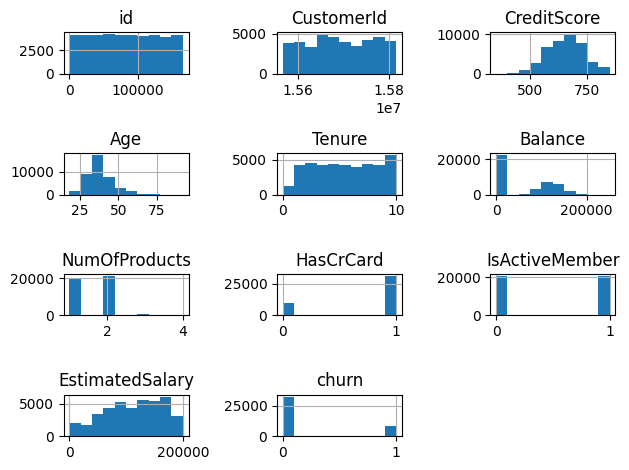

In [635]:
# check distribution 
df.hist()
plt.tight_layout()
plt.show()

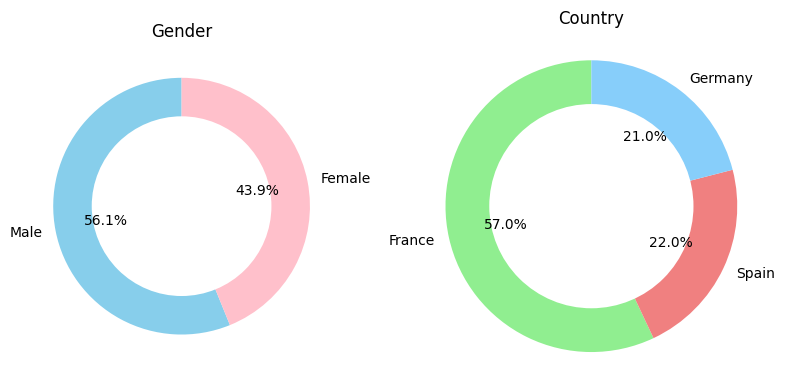

In [636]:
# Count occurrences of unique values in each variable
gender_counts = df['Gender'].value_counts()
geography_counts = df['Geography'].value_counts()

# Plotting the donut chart for 'gender'
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Gender')

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Plotting the donut chart for 'country'
plt.subplot(1, 2, 2)
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Country')

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.axis('equal')
plt.tight_layout()
plt.show()

In [637]:
geography_counts = df['Surname'].value_counts()
len(geography_counts)

2274

<Axes: >

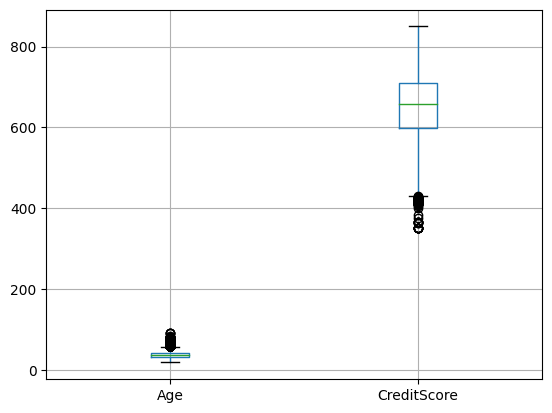

In [638]:
# boxplot
df.boxplot(['Age', 'CreditScore'])

<Axes: >

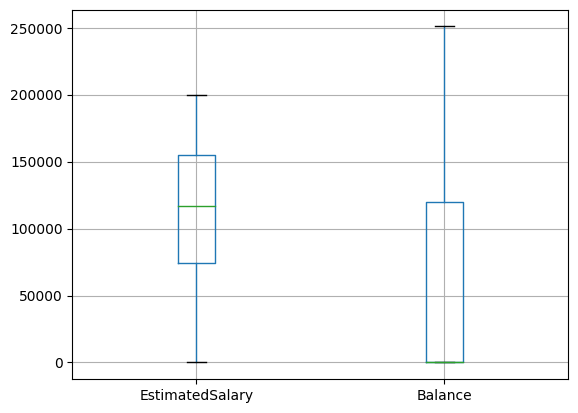

In [639]:
df.boxplot(['EstimatedSalary', 'Balance'])

# **PREPROCESSING**

In [640]:
# Drop irrelevant variables
df = df.drop(['id', 'Surname', 'CustomerId'], axis = 1)

**Split Data**

In [641]:
# Split data
input_df=df.drop(['churn'],axis=1)
output_df=df['churn']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

**Handle Missing Values**

In [642]:
x_train_clean = x_train['CreditScore'].dropna()
print('median CreditScore:',np.median(x_train_clean))

median CreditScore: 659.0


In [643]:
# Handle missing values in variable ['CreditScore'] with median
x_train['CreditScore'].fillna(659.0, inplace = True)
x_test['CreditScore'].fillna(659.0, inplace = True)

In [644]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33007 entries, 23629 to 15795
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      33007 non-null  float64
 1   Geography        33007 non-null  object 
 2   Gender           33007 non-null  object 
 3   Age              33007 non-null  float64
 4   Tenure           33007 non-null  int64  
 5   Balance          33007 non-null  float64
 6   NumOfProducts    33007 non-null  int64  
 7   HasCrCard        33007 non-null  int64  
 8   IsActiveMember   33007 non-null  int64  
 9   EstimatedSalary  33007 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.8+ MB


In [645]:
x_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

 **Encode**

In [646]:
#Binary Encoding Categorical to integer
xtrain_encode={"Gender": {"Male":1,"Female" :0}}
x_train=x_train.replace(xtrain_encode)
x_test=x_test.replace(xtrain_encode)

In [647]:
filename = 'gender_encode.pkl'
pkl.dump(xtrain_encode, open(filename, 'wb'))

In [648]:
#One hot Encoding
geo_enc_train=x_train[['Geography']]

geo_enc_test=x_test[['Geography']]

train_encoded_geo=OneHotEncoder()

geo_enc_train=pd.DataFrame(train_encoded_geo.fit_transform(geo_enc_train).toarray(),columns=train_encoded_geo.get_feature_names_out())

geo_enc_test=pd.DataFrame(train_encoded_geo.transform(geo_enc_test).toarray(),columns=train_encoded_geo.get_feature_names_out())

x_train=x_train.reset_index()
x_test=x_test.reset_index()

x_train_enc=pd.concat([x_train,geo_enc_train], axis=1)
x_test_enc=pd.concat([x_test,geo_enc_test], axis=1)

In [649]:
x_train_enc = x_train_enc.drop(['Geography', 'index'], axis=1)
x_test_enc = x_test_enc.drop(['Geography', 'index'], axis=1)

In [650]:
filename_subs = 'oneHot_encode_geo.pkl'
pkl.dump(train_encoded_geo, open(filename_subs, 'wb'))

In [651]:
x_train_enc

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,708.0,0,45.0,2,0.00,1,1,0,182076.97,1.0,0.0,0.0
1,676.0,1,35.0,7,0.00,2,1,0,166053.92,0.0,0.0,1.0
2,645.0,0,36.0,4,133980.80,1,1,1,112333.63,1.0,0.0,0.0
3,791.0,1,37.0,1,0.00,2,1,0,132973.17,0.0,0.0,1.0
4,637.0,0,48.0,7,0.00,2,1,1,146573.66,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33002,704.0,0,43.0,3,0.00,2,0,1,47775.17,1.0,0.0,0.0
33003,619.0,1,29.0,3,98955.87,2,0,0,131712.51,0.0,1.0,0.0
33004,791.0,1,42.0,0,113657.41,1,0,1,139946.68,0.0,1.0,0.0
33005,587.0,1,35.0,7,0.00,3,1,1,53387.90,1.0,0.0,0.0


**Scale Data**

In [652]:
# scaling
columns_to_scale = ['CreditScore','Age','Balance', 'EstimatedSalary']
scaler = StandardScaler()
x_train_scaled = x_train_enc.copy()
x_test_scaled = x_test_enc.copy()
x_train_scaled[columns_to_scale] = scaler.fit_transform(x_train_enc[columns_to_scale])
x_test_scaled[columns_to_scale] = scaler.transform(x_test_enc[columns_to_scale])

x_test_scaled

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.295530,0,-0.688980,2,-0.886546,2,0,1,-1.458667,0.0,0.0,1.0
1,-0.641380,1,-0.688980,3,-0.886546,2,1,0,0.511840,1.0,0.0,0.0
2,2.119381,0,0.107180,8,0.925244,2,0,1,1.225088,0.0,1.0,0.0
3,0.507897,1,0.675865,3,-0.886546,1,1,1,0.616985,0.0,0.0,1.0
4,-1.328447,0,2.040709,2,0.758006,1,1,0,-0.422976,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8247,1.669665,1,1.130813,7,0.973394,1,1,0,-0.418721,0.0,0.0,1.0
8248,0.382975,1,-0.575243,0,1.276083,2,1,0,0.188763,0.0,1.0,0.0
8249,-0.991159,1,-0.006557,3,-0.886546,2,1,1,1.499797,1.0,0.0,0.0
8250,1.482283,1,-0.575243,1,-0.886546,2,1,0,-0.238583,1.0,0.0,0.0


# **MODEL**

**Model RF**

In [653]:
RF_class = RandomForestClassifier()
RF_class.fit(x_train_enc, y_train)

RandomForestClassifier()

In [654]:
y_predict_RF=RF_class.predict(x_test_enc)

In [655]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_RF, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.88      0.95      0.91      6513
           0       0.72      0.50      0.59      1739

    accuracy                           0.85      8252
   macro avg       0.80      0.73      0.75      8252
weighted avg       0.84      0.85      0.84      8252



**Model RF with scaled data**

In [656]:
RF_class.fit(x_train_scaled, y_train)
y_predict_RF_scaled=RF_class.predict(x_test_scaled)
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_RF_scaled, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.88      0.95      0.91      6513
           0       0.72      0.51      0.60      1739

    accuracy                           0.86      8252
   macro avg       0.80      0.73      0.76      8252
weighted avg       0.85      0.86      0.85      8252



**Find best parameters for RF**

In [657]:
# Define the parameter grid
param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=RF_class, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(x_train_enc, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 8}
Best Score: 0.8607566918270992


**Tune RF model**

In [658]:
RF_class_tune = RandomForestClassifier(criterion= 'log_loss', max_depth= 8)

In [659]:
RF_class_tune.fit(x_train_enc, y_train)
y_predict_RF_tune=RF_class_tune.predict(x_test_enc)
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_RF_tune, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.87      0.96      0.92      6513
           0       0.78      0.47      0.59      1739

    accuracy                           0.86      8252
   macro avg       0.83      0.72      0.75      8252
weighted avg       0.85      0.86      0.85      8252



**Model XGBoost**

In [660]:
xgb_class = XGBClassifier()

xgb_class.fit(x_train_enc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [661]:
y_predict_XGB=xgb_class.predict(x_test_enc)

In [662]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_XGB, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.89      0.94      0.91      6513
           0       0.72      0.54      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.80      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



**Model XGB with scaled data**

In [663]:
xgb_class.fit(x_train_scaled, y_train)
y_predict_XGB_scaled=xgb_class.predict(x_test_scaled)
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_XGB_scaled, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.89      0.95      0.92      6513
           0       0.73      0.54      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.81      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



**Find best parameters for XGB**

In [664]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_class, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(x_train_enc, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Score: 0.863543937166121


**Tune XGB model**

In [665]:
xgb_class_tune = XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 200)

In [666]:
xgb_class_tune.fit(x_train_enc, y_train)
y_predict_XGB_tune=xgb_class_tune.predict(x_test_enc)
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_XGB_tune, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.88      0.96      0.92      6513
           0       0.76      0.52      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.82      0.74      0.77      8252
weighted avg       0.86      0.86      0.85      8252



In [667]:
filename = 'XGB_churn.pkl'
pkl.dump(xgb_class_tune, open(filename, 'wb'))